In [3]:
%pip install tensorflow matplotlib

import tensorflow as tf
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
print("current working directory: ", os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"dataset","Train")
test_path = os.path.join(curr_dir,"dataset","Test")
valid_path = os.path.join(curr_dir,"dataset","Valid")

current working directory:  c:\Users\tilak\OneDrive\Desktop\POTATO-DISEASE-PROJECT


In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle= True,
        interpolation="bilinear",


)

Found 900 files belonging to 3 classes.


In [6]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
        interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [8]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding="same", activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

c:\Users\tilak\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [10]:
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.3611 - loss: 1.5423 - val_accuracy: 0.5033 - val_loss: 0.9685
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 896ms/step - accuracy: 0.6665 - loss: 0.7128 - val_accuracy: 0.7233 - val_loss: 0.6319
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 899ms/step - accuracy: 0.7205 - loss: 0.5950 - val_accuracy: 0.7267 - val_loss: 0.5653
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 892ms/step - accuracy: 0.7566 - loss: 0.5372 - val_accuracy: 0.7700 - val_loss: 0.5179
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 896ms/step - accuracy: 0.8518 - loss: 0.3685 - val_accuracy: 0.8833 - val_loss: 0.2851
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 898ms/step - accuracy: 0.8919 - loss: 0.2356 - val_accuracy: 0.8533 - val_loss: 0.3462
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 923ms/step - accuracy: 0.9041 - loss: 0.2865 - val_accuracy: 0.9133 - val_loss: 0.1862
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 218s 8s/step - accuracy: 0.9522 - loss: 0.1392 - val_accuracy:

In [12]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Traininng accuracy:',train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 228ms/step - accuracy: 0.9887 - loss: 0.0405
Traininng accuracy: 0.9866666793823242


In [13]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:',val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.9397 - loss: 0.1362
Validation accuracy: 0.9399999976158142


In [15]:
cnn.save('trained_plant_disease_model.keras')

In [16]:
training_history.history

{'accuracy': [0.4399999976158142,
  0.6611111164093018,
  0.7222222089767456,
  0.7900000214576721,
  0.8833333253860474,
  0.8855555653572083,
  0.9211111068725586,
  0.9577777981758118,
  0.9200000166893005,
  0.9566666483879089],
 'loss': [1.2041172981262207,
  0.6930809020996094,
  0.6011689305305481,
  0.4822388291358948,
  0.3059673607349396,
  0.266231894493103,
  0.2279370129108429,
  0.11887022107839584,
  0.2210889756679535,
  0.12077970802783966],
 'val_accuracy': [0.503333330154419,
  0.7233333587646484,
  0.7266666889190674,
  0.7699999809265137,
  0.8833333253860474,
  0.8533333539962769,
  0.9133333563804626,
  0.9233333468437195,
  0.9066666960716248,
  0.9399999976158142],
 'val_loss': [0.9684773683547974,
  0.6318598985671997,
  0.5652571320533752,
  0.5179111957550049,
  0.2850950062274933,
  0.34619811177253723,
  0.1862437129020691,
  0.17705731093883514,
  0.24265433847904205,
  0.13714055716991425]}

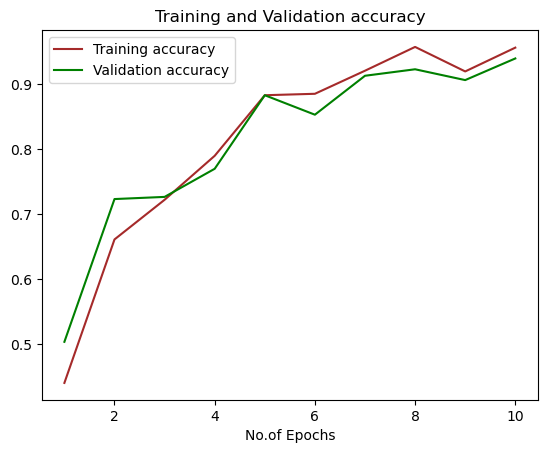

In [17]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color="brown",label = 'Training accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color="green",label = 'Validation accuracy')
plt.xlabel('No.of Epochs')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()